# Welcome to the notebook for Hong Kong JobsDb job advertisement analysis


## import module and data

In [1]:
# scrap the data

# run hkjobsdb_scrap.py outside of this notebook
# returns <job title-date of scrap-number>.csv

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [94]:
# important parameters
file_name = ('data-scientist-2022-12-06-1.csv')

In [95]:
# load the dat
df_raw = pd.read_csv(file_name)


## inspect the data

In [96]:
df_raw.head(10)

,title,salary,company,posted,district,job_description,Career Level,Years of Experience,Company Website,Qualification,Job Type,Job Functions,url
0,Data Scientist,salary,Connexe Search Limited,2022-12-06,Kowloon Bay,Our client is one of the leading financial ins...,NaN,NaN,NaN,NaN,Contract,"Banking / Finance, Others, Information Technol...",https://hk.jobsdb.com/hk/en/job/data-scientist...
1,Data Analyst (Data & AI),salary,NCSI (HK) Limited,2022-12-06,Tai Koo,Key Role Responsibilities:\n\nParticipate in c...,NaN,NaN,http://www.ncs-i.com,NaN,"Full Time, Permanent","Information Technology (IT), Product Managemen...",https://hk.jobsdb.com/hk/en/job/data-analyst-d...
2,Data Analyst (Data Governance),salary,Gientech Technology (Hong Kong) Limited,2022-12-06,Ngau Tau Kok,Duties:\nManage & support data governance mode...,Middle,3 years,NaN,Degree,"Full Time, Permanent","Information Technology (IT), Data Scientist",https://hk.jobsdb.com/hk/en/job/data-analyst-d...
3,Solution Analyst - ICC - Data Integration,salary,Cathay Pacific Airways Ltd,2022-12-06,Lantau Island,Reports to: Solution Lead / Senior Solution Le...,NaN,NaN,http://www.cathaypacific.com/careers,NaN,"Full Time, Permanent","Transportation & Logistics, Aviation Services,...",https://hk.jobsdb.com/hk/en/job/solution-analy...
4,Analyst Programmer (Data Analytics),salary,China State Construction Engineering (Hong Kon...,2022-12-06,district,Job Description:\nEstablish and maintain high-...,Entry Level,3 years,https://www.cscechk.com/en/,Degree,"Full Time, Permanent","Information Technology (IT), DBA, Others, Data...",https://hk.jobsdb.com/hk/en/job/analyst-progra...
5,Business Intelligence Analyst,salary,Bureau Veritas Hong Kong Limited,2022-12-06,Kowloon Bay,Responsibilities:\nBuild dashboards to suppor...,Middle,5 years,NaN,Degree,"Full Time, Permanent","Professional Services, Business Analysis / Dat...",https://hk.jobsdb.com/hk/en/job/business-intel...
6,Data Integration Engineer (Data & AI),salary,NCSI (HK) Limited,2022-12-06,Tai Koo,Key Role Responsibilities:\n\nDrive Data & AI ...,NaN,NaN,http://www.ncs-i.com,NaN,"Full Time, Permanent","Information Technology (IT), Product Managemen...",https://hk.jobsdb.com/hk/en/job/data-integrati...
7,Data Scientist [Python & Cloud project],salary,Peoplehub Limited,2022-12-06,district,Responsibilities:\nEstablish and maintain high...,NaN,NaN,https://www.peoplehub.hk/,NaN,"Full Time, Permanent","Information Technology (IT), Application Speci...",https://hk.jobsdb.com/hk/en/job/data-scientist...
8,Senior Associate (Data Analyst) – Risk Advisor...,salary,BDO,2022-12-06,Sheung Wan,"Responsibilities:\nCollect data, build and mai...",Middle,2 years,http://www.bdo.com.hk,Degree,"Full Time, Permanent","Professional Services, Business Analysis / Dat...",https://hk.jobsdb.com/hk/en/job/senior-associa...
9,Data Engineer,salary,Orient Overseas Container Line Ltd (OOCL),2022-12-06,Shatin Area,"Job Description\nResponsible for design, devel...",Middle,2 years,http://www.oocl.com,Degree,"Full Time, Permanent","Information Technology (IT), Application Speci...",https://hk.jobsdb.com/hk/en/job/data-engineer-...


In [97]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                349 non-null    object
 1   salary               349 non-null    object
 2   company              349 non-null    object
 3   posted               349 non-null    object
 4   district             345 non-null    object
 5   job_description      349 non-null    object
 6   Career Level         264 non-null    object
 7   Years of Experience  233 non-null    object
 8   Company Website      214 non-null    object
 9   Qualification        281 non-null    object
 10  Job Type             349 non-null    object
 11  Job Functions        349 non-null    object
 12  url                  349 non-null    object
dtypes: object(13)
memory usage: 35.6+ KB


## data cleaning

### need recategorize to fewer catergories
* data job type
* career level

### feature extraction
* job type to binary: full time (T/F)
* job functions: label category for each job functions

### convert to numerical variable
* years of experience

In [98]:
df_clean_1= df_raw.copy()

In [99]:
# convert all strings to lowercase 
# df_clean_1['title']= df_clean_1["title"].str.lower()

In [100]:
df_clean_1[df_clean_1["title"].str.contains("analyst",case=False)].head()

,title,salary,company,posted,district,job_description,Career Level,Years of Experience,Company Website,Qualification,Job Type,Job Functions,url
1,Data Analyst (Data & AI),salary,NCSI (HK) Limited,2022-12-06,Tai Koo,Key Role Responsibilities:\n\nParticipate in c...,NaN,NaN,http://www.ncs-i.com,NaN,"Full Time, Permanent","Information Technology (IT), Product Managemen...",https://hk.jobsdb.com/hk/en/job/data-analyst-d...
2,Data Analyst (Data Governance),salary,Gientech Technology (Hong Kong) Limited,2022-12-06,Ngau Tau Kok,Duties:\nManage & support data governance mode...,Middle,3 years,NaN,Degree,"Full Time, Permanent","Information Technology (IT), Data Scientist",https://hk.jobsdb.com/hk/en/job/data-analyst-d...
3,Solution Analyst - ICC - Data Integration,salary,Cathay Pacific Airways Ltd,2022-12-06,Lantau Island,Reports to: Solution Lead / Senior Solution Le...,NaN,NaN,http://www.cathaypacific.com/careers,NaN,"Full Time, Permanent","Transportation & Logistics, Aviation Services,...",https://hk.jobsdb.com/hk/en/job/solution-analy...
4,Analyst Programmer (Data Analytics),salary,China State Construction Engineering (Hong Kon...,2022-12-06,district,Job Description:\nEstablish and maintain high-...,Entry Level,3 years,https://www.cscechk.com/en/,Degree,"Full Time, Permanent","Information Technology (IT), DBA, Others, Data...",https://hk.jobsdb.com/hk/en/job/analyst-progra...
5,Business Intelligence Analyst,salary,Bureau Veritas Hong Kong Limited,2022-12-06,Kowloon Bay,Responsibilities:\nBuild dashboards to suppor...,Middle,5 years,NaN,Degree,"Full Time, Permanent","Professional Services, Business Analysis / Dat...",https://hk.jobsdb.com/hk/en/job/business-intel...


In [101]:
len(df_clean_1[df_clean_1["title"].str.contains("analyst",case=False)])

154

In [102]:
# job titles by job nature
generic_job_titles = ['analyst programmer',
                      'business analyst',
                      'business intelligence analyst',
                      'data analyst', 
                      'data engineer',
                      'data scientist',
                      'devops',
                      'machine learning',
                      'mlops',
                      'programmer',
                      'quantitative researcher',
                       ]

In [103]:
def count_title_by_job_nature(df, generic_titles):
    count_by_generic = []
    count = 0
    for title in generic_titles: 
        count = len(df[df['title'].str.contains(title, case=False)])
        count_by_generic.append(count)
    return count_by_generic

In [104]:
count_by_generic_titles = count_title_by_job_nature(df_clean_1, generic_job_titles)

Since some job titles on the advertisment contains multiple titles, title match was implemented in a way that allows multiple matches too. The pie chart represents the portion of title matchs among all generic titles, instead of all job ads

In [105]:
df_title = pd.DataFrame({'Generic Title':generic_job_titles, 'Count':count_by_generic_titles})
df_title.sort_values(by='Count',ascending= False, inplace=True)
df_title

,Generic Title,Count
3,data analyst,94
4,data engineer,36
5,data scientist,22
9,programmer,19
1,business analyst,15
0,analyst programmer,10
7,machine learning,7
10,quantitative researcher,5
2,business intelligence analyst,4
6,devops,1


In [106]:
# filter
df_pie_title = df_title[df_title['Count']>5]
other_row = pd.Series({'Generic Title':'Others', 'Count' : 5})
df_pie_title= pd.concat([df_pie_title, other_row.to_frame().T], ignore_index = True)
# this line copied from pandas docs 

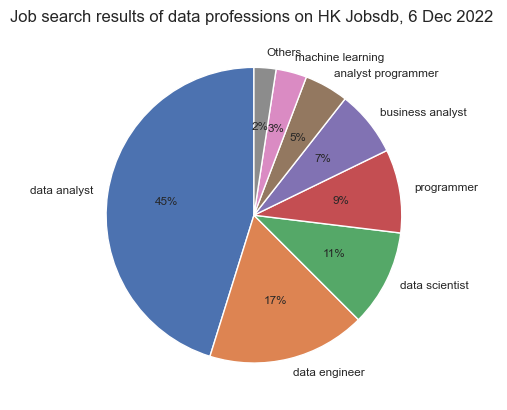

In [114]:
ax = df_pie_title.plot(y='Count', 
                        kind='pie', 
                        labels= df_pie_title['Generic Title'], 
                        autopct = '%1.0f%%',
                        legend=False,
                        title='Job search results of data professions on HK Jobsdb, 6 Dec 2022 ',
                        startangle=90,
                         fontsize = 8.5
                      )   
ax.set(ylabel='')
ax.figure.savefig('job_titles.svg')
ax.figure.savefig('job_titles.png')
